In [42]:
best_predictors = ['Elevation', 
 'Horizontal_Distance_To_Roadways',
 'Horizontal_Distance_To_Fire_Points',
 'Horizontal_Distance_To_Hydrology',
 'Aspect',
 'Slope']

best_categorical = 'Wilderness_Area4'

combined_predictor = ['Hillshade_9am', 'Hillshade_3pm', 'Hillshade_Noon']

In [43]:
DATA_DIR = '/kaggle/input/learn-together'
DATA_DIR = 'data'

In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
%matplotlib inline

In [45]:
train_df=pd.read_csv(os.path.join(DATA_DIR, 'train.csv'))
test_df=pd.read_csv(os.path.join(DATA_DIR, 'test.csv'))
train_df = train_df.drop(["Id"], axis = 1)
test_ids = test_df["Id"]
test_df = test_df.drop(["Id"], axis = 1)

In [46]:
X = train_df[best_predictors]

In [47]:
X['Hillshade'] = train_df[combined_predictor].sum(axis=1)

/home/ivan/pybr/kaggle-forest-types/venv/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [48]:
X.head()

,Elevation,Horizontal_Distance_To_Roadways,Horizontal_Distance_To_Fire_Points,Horizontal_Distance_To_Hydrology,Aspect,Slope,Hillshade
0,2596,510,6279,258,51,3,601
1,2590,390,6225,212,56,2,606
2,2804,3180,6121,268,139,9,607
3,2785,3090,6211,242,155,18,598
4,2595,391,6172,153,45,2,604


In [49]:
X.describe()

,Elevation,Horizontal_Distance_To_Roadways,Horizontal_Distance_To_Fire_Points,Horizontal_Distance_To_Hydrology,Aspect,Slope,Hillshade
count,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000
mean,2749.322553,1714.023214,1511.147288,227.195701,156.676653,16.501587,566.761905
std,417.678187,1325.066358,1099.936493,210.075296,110.085801,8.453927,51.375104
min,1863.000000,0.000000,0.000000,0.000000,0.000000,0.000000,317.000000
25%,2376.000000,764.000000,730.000000,67.000000,65.000000,10.000000,541.000000
50%,2752.000000,1316.000000,1256.000000,180.000000,126.000000,15.000000,577.000000
75%,3104.000000,2270.000000,1988.250000,330.000000,261.000000,22.000000,604.000000
max,3849.000000,6890.000000,6993.000000,1343.000000,360.000000,52.000000,641.000000


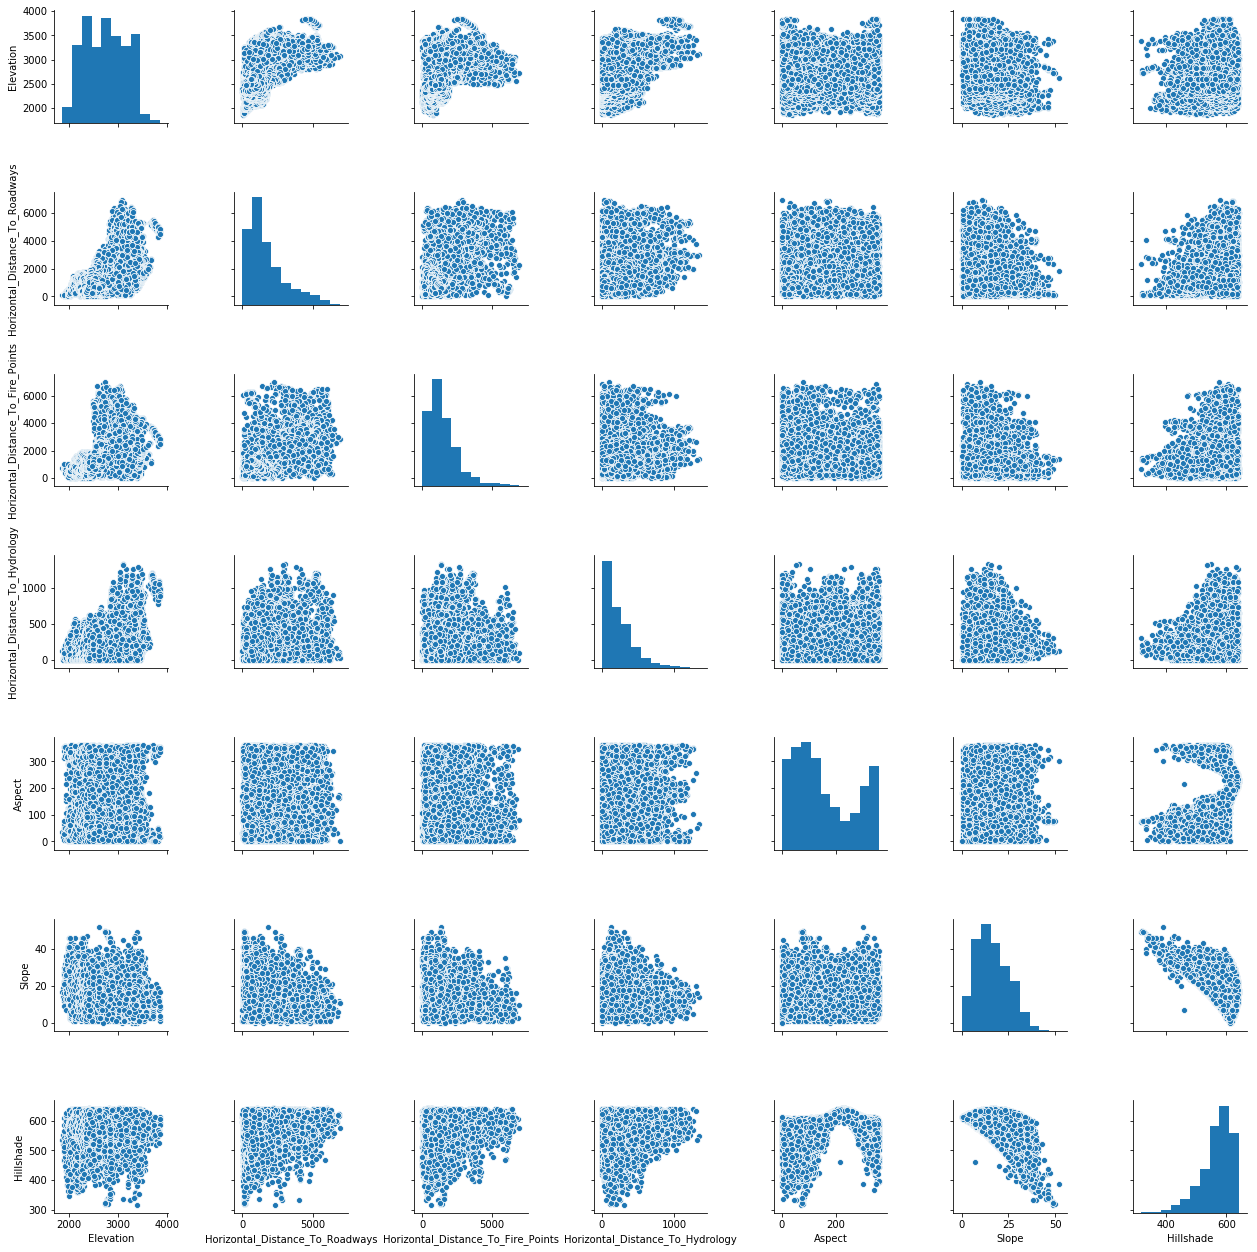

In [50]:
sns.pairplot(X)

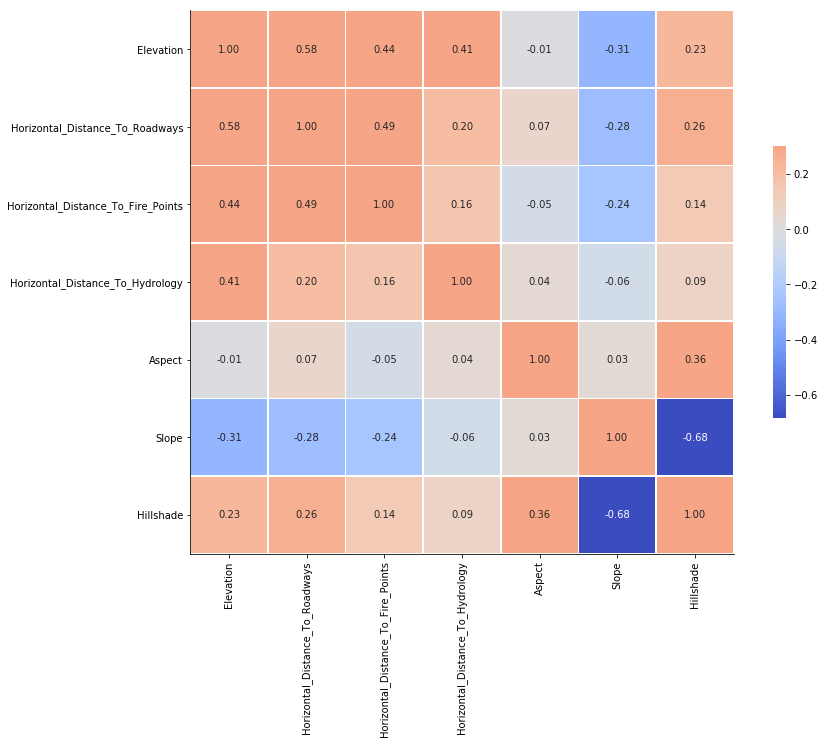

In [51]:
corr = X.corr()
g = sns.heatmap(corr,  vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt='.2f', cmap='coolwarm')
sns.despine()
g.figure.set_size_inches(14,10)
    
plt.show()

In [55]:
import numpy as np
X_log =  X.transform(lambda x: np.log(x + 1))

In [56]:
X_log.head()

,Elevation,Horizontal_Distance_To_Roadways,Horizontal_Distance_To_Fire_Points,Horizontal_Distance_To_Hydrology,Aspect,Slope,Hillshade
0,7.862112,6.236370,8.745125,5.556828,3.951244,1.386294,6.400257
1,7.859799,5.968708,8.736489,5.361292,4.043051,1.098612,6.408529
2,7.939159,8.064951,8.719644,5.594711,4.941642,2.302585,6.410175
3,7.932362,8.036250,8.734238,5.493061,5.049856,2.944439,6.395262
4,7.861727,5.971262,8.727940,5.036953,3.828641,1.098612,6.405228


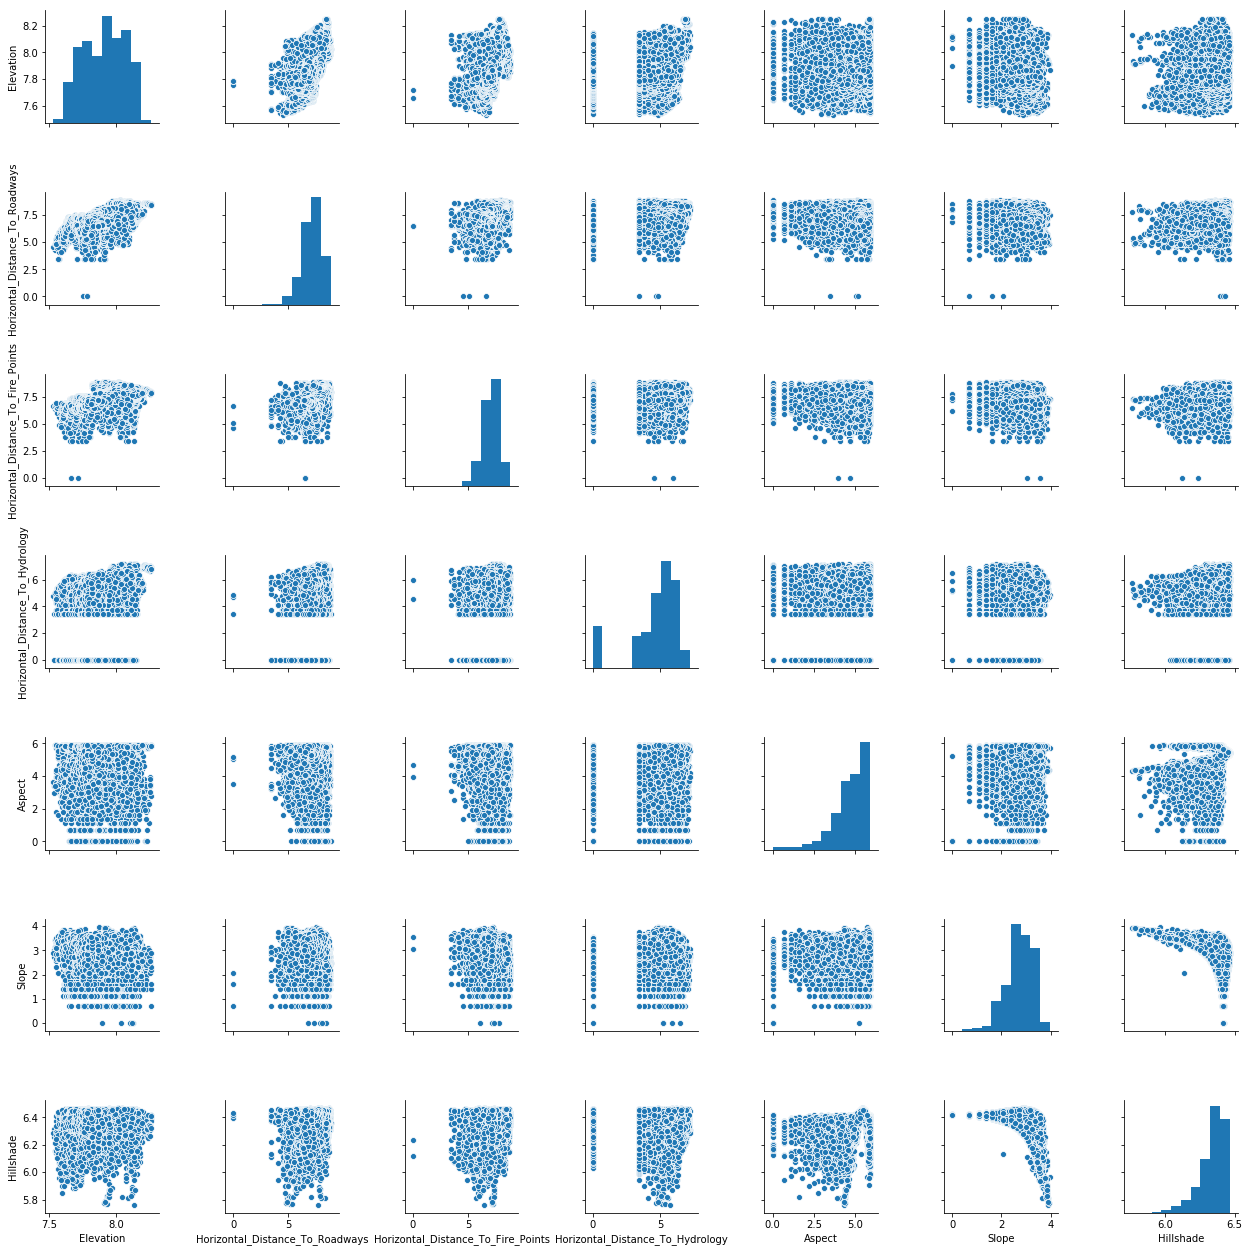

In [57]:
sns.pairplot(X_log)

In [58]:
y = train_df['Cover_Type']

In [59]:
model = LogisticRegression()
model.fit(X, y)
model.score(X, y)

/home/ivan/pybr/kaggle-forest-types/venv/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/ivan/pybr/kaggle-forest-types/venv/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.4792989417989418

In [60]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [61]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import RidgeClassifier, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split


models = [AdaBoostClassifier(), GradientBoostingClassifier(), 
          RandomForestClassifier(), RidgeClassifier(),
          LogisticRegression(), DecisionTreeClassifier()]

X_train, X_val, y_train, y_val = train_test_split(X_scaled, y)

In [62]:
for model in models:
    model.fit(X_train, y_train)
    print(model.__class__.__name__)
    print(model.score(X_train, y_train))
    predictions = model.predict(X_val)
    print(accuracy_score(y_val, predictions))
    print(f1_score(y_val, predictions, average='micro'))
    print(f1_score(y_val, predictions, average='weighted'))

AdaBoostClassifier
0.5128747795414462
0.5190476190476191
0.5190476190476191
0.43691148432860977
GradientBoostingClassifier
0.8115520282186949
0.7529100529100529
0.7529100529100529
0.7484212299373826


/home/ivan/pybr/kaggle-forest-types/venv/lib/python3.5/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/ivan/pybr/kaggle-forest-types/venv/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/ivan/pybr/kaggle-forest-types/venv/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


RandomForestClassifier
0.9940035273368607
0.7984126984126985
0.7984126984126985
0.7970378045188988
RidgeClassifier
0.4474426807760141
0.4444444444444444
0.4444444444444444
0.4054435434398449
LogisticRegression
0.5457671957671958
0.544973544973545
0.544973544973545
0.5327804620625973
DecisionTreeClassifier
1.0
0.7404761904761905
0.7404761904761906
0.7399333090199188
